# Explore here

In [18]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('client_id')
client_secret = os.environ.get('client_secret')


In [19]:
print(client_id)

f65e4b63a05d4357a3bb9cacb1cf474d


In [20]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

con = sp.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [21]:
import spotipy as sp
artist_id = "3TVXtAsR1Inumwj472S9r4"

response = con.artist_top_tracks("3TVXtAsR1Inumwj472S9r4")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [22]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms        name  popularity
3     5.097333    She Will          75
9     3.933100   Headlines          77
8     3.316217  God's Plan          78


no relationship between length of song and popularity


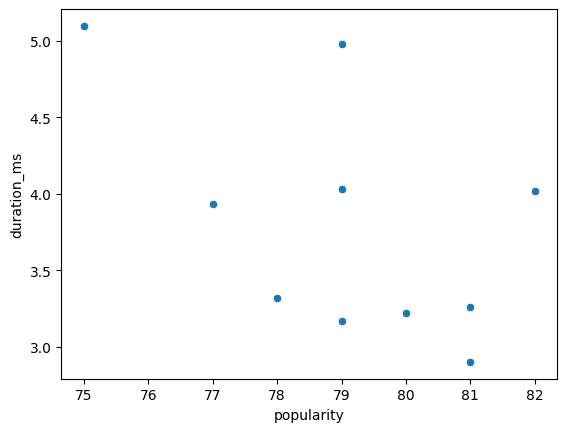

In [23]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

print(f'no relationship between length of song and popularity')